<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%208/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_8_%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, LabelEncoder)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, auc, accuracy_score)
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drug200.csv')
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


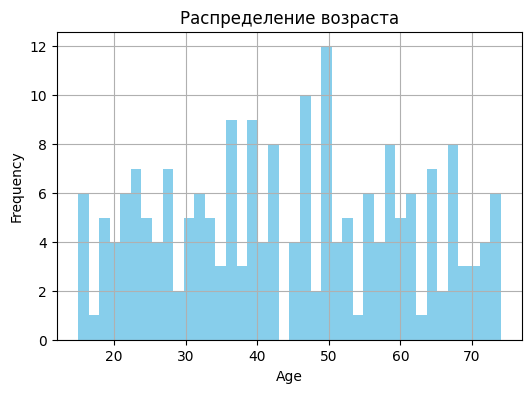

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
df['Age'].hist(bins=40, color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

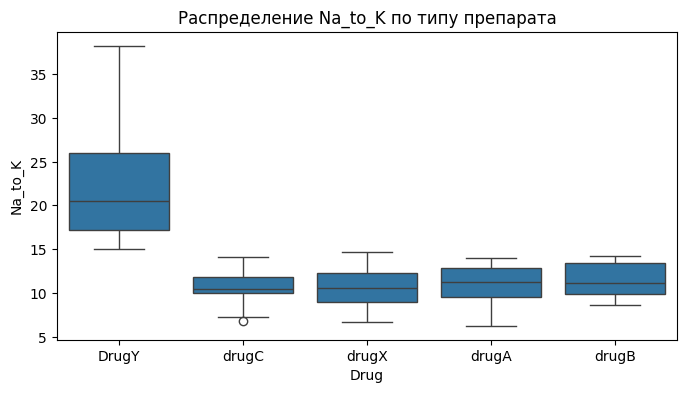

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Drug', y='Na_to_K', data=df)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Na_to_K –ø–æ —Ç–∏–ø—É –ø—Ä–µ–ø–∞—Ä–∞—Ç–∞")
plt.show()

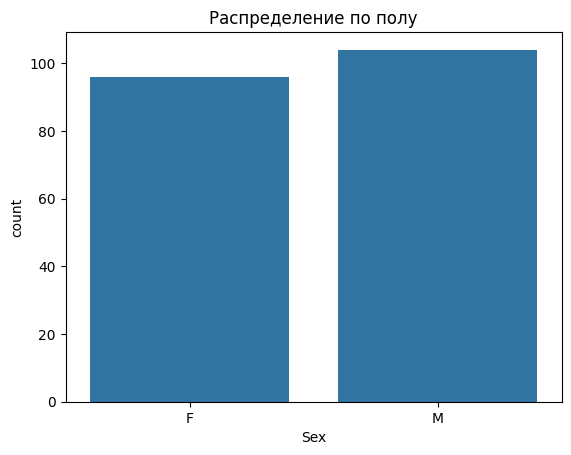

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É")
plt.show()

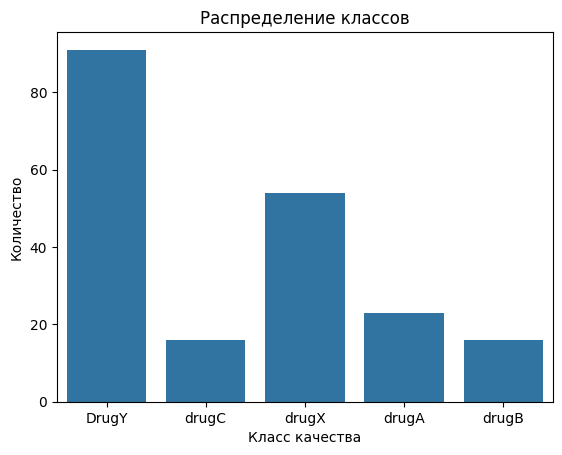

In [ ]:
sns.countplot(x='Drug', data=df)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤')
plt.xlabel('–ö–ª–∞—Å—Å –∫–∞—á–µ—Å—Ç–≤–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

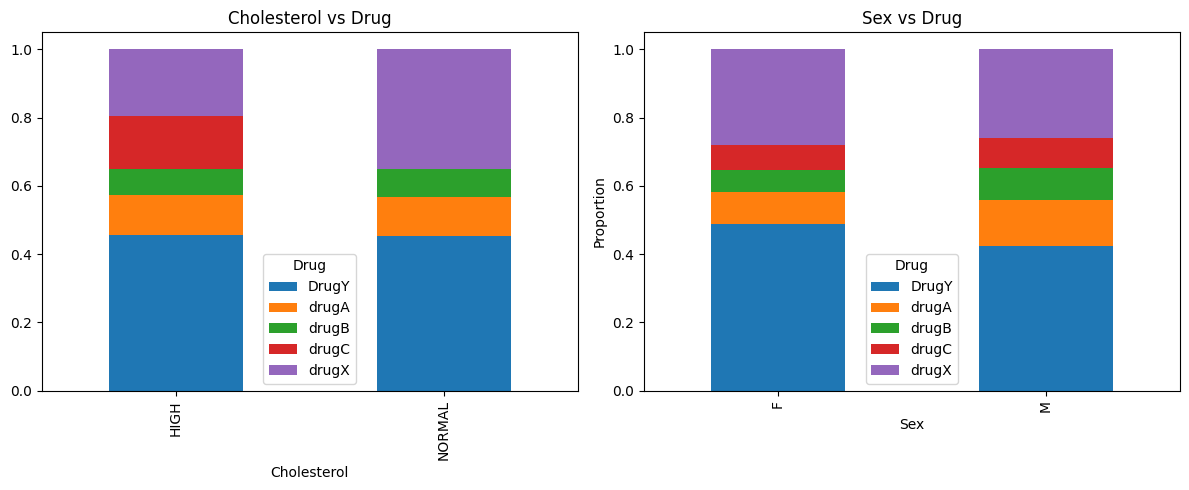

In [ ]:
# –∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —É—Ä–æ–≤–Ω–µ–º –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è (BP) –∏ –Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—ã–º –ª–µ–∫–∞—Ä—Å—Ç–≤–æ–º (Drug).
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

pd.crosstab(df['Cholesterol'], df['Drug'], normalize='index').plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Cholesterol vs Drug")
plt.ylabel("Proportion")

pd.crosstab(df['Sex'], df['Drug'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Sex vs Drug")
plt.ylabel("Proportion")

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes('object').columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [ ]:
enc = LabelEncoder()

features_cat = ['Sex', 'BP', 'Cholesterol', 'Drug']

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

X = df.drop('Drug', axis=1)
y = df['Drug']

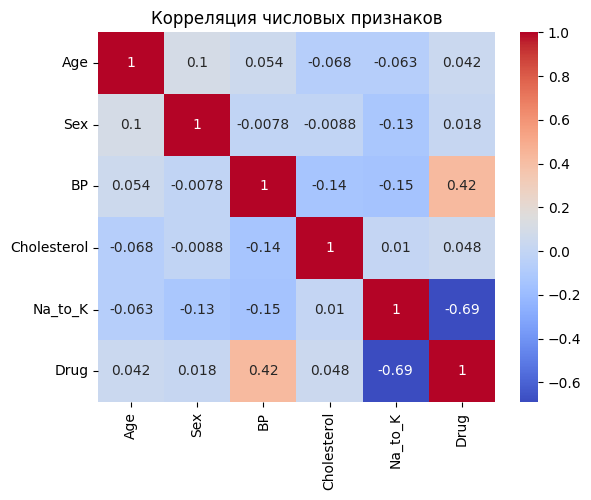

In [ ]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.show()

In [ ]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



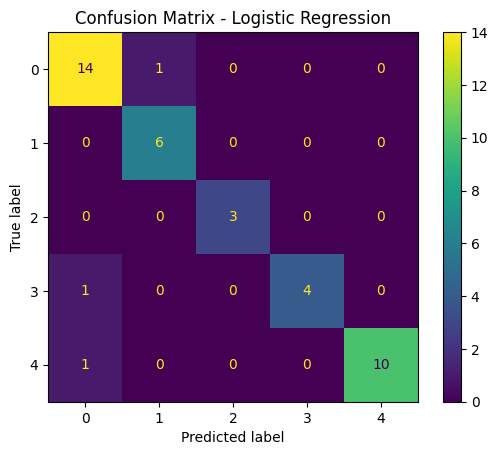

In [ ]:
# ======================
# –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
# ======================
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# create numpy array for future K value
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

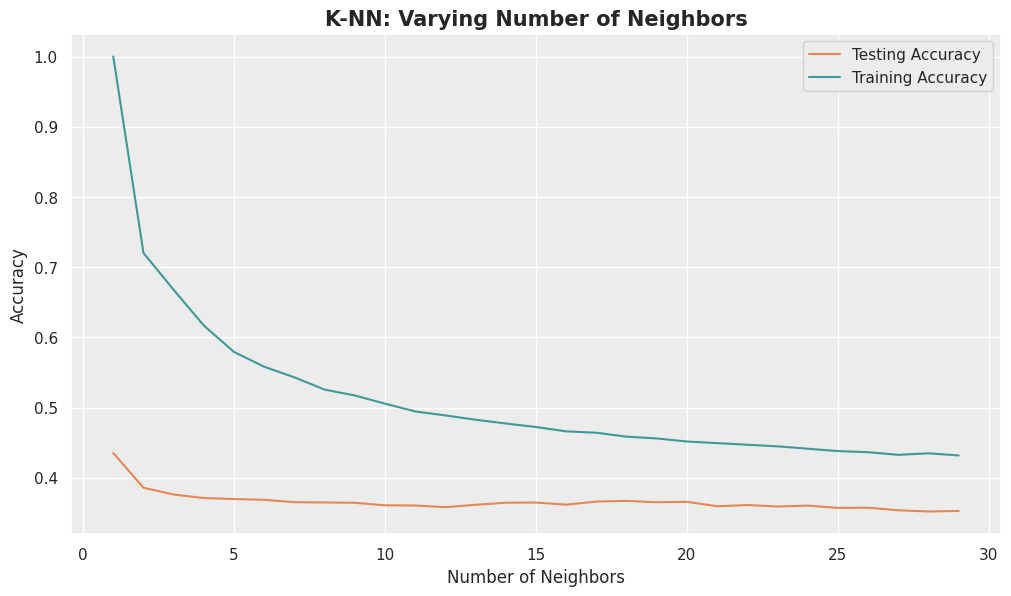

In [ ]:
# Generate plot
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots
plt.figure(figsize=(12,6.5))
plt.title(label='K-NN: Varying Number of Neighbors', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color='#E68753')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color = '#409996')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (k=5)

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.98      0.95      0.96        40
weighted avg       0.96      0.95      0.95        40



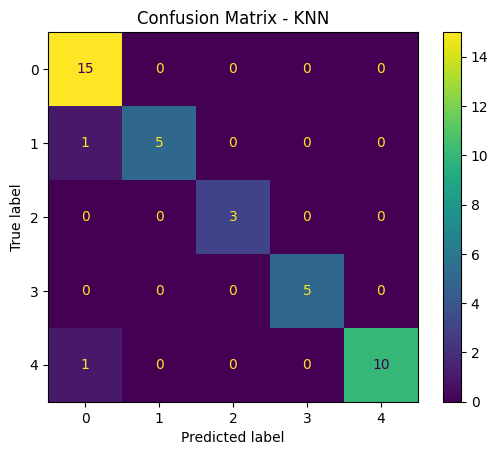

In [ ]:
# ======================
# K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (KNN)
# ======================
print("\nK-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (k=5)")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Confusion Matrix - KNN")
plt.show()


–¢–æ—á–Ω–æ—Å—Ç—å Logistic Regression: 0.93
–¢–æ—á–Ω–æ—Å—Ç—å KNN: 0.95


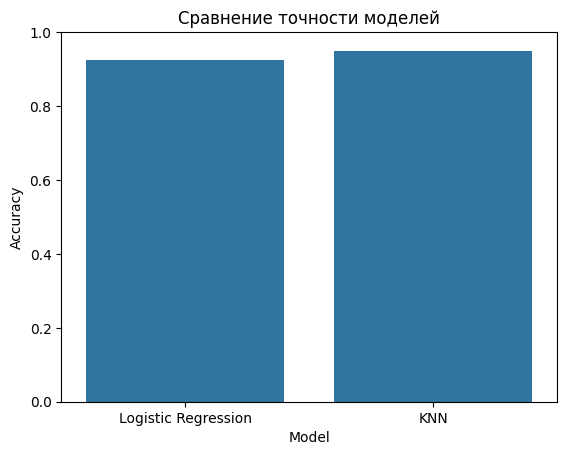

In [ ]:
# ======================
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ —Ç–æ—á–Ω–æ—Å—Ç–∏
# ======================
from sklearn.metrics import accuracy_score

acc_log = accuracy_score(y_test, y_pred_log)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"\n–¢–æ—á–Ω–æ—Å—Ç—å Logistic Regression: {acc_log:.2f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å KNN: {acc_knn:.2f}")

# –ì—Ä–∞—Ñ–∏–∫ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [acc_log, acc_knn]
})
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.ylim(0, 1.0)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π')
plt.show()

# C—Ç—Ä–∞—Ç–µ–≥–∏–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤ —É—Å–ª–æ–≤–∏—è—Ö –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤

# –ü–æ—á–µ–º—É 94% —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–ª–æ—Ö–æ? ü§î

In [ ]:
df = pd.read_csv('/content/fraud_detection.csv')
df

transaction_id  amount merchant_type device_type  label
0                 1   46.93        travel      tablet      0
1                 2  301.01     groceries     desktop      0
2                 3  131.67        others      tablet      0
3                 4   91.29   electronics     desktop      0
4                 5   16.96        others      mobile      0
..              ...     ...           ...         ...    ...
995             996    9.61      clothing      tablet      0
996             997  249.27        travel      mobile      0
997             998   14.71        others      mobile      0
998             999  300.05        travel      tablet      0
999            1000   59.06     groceries     desktop      0

[1000 rows x 5 columns]

In [ ]:
df.info()

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   object 
 3   device_type     1000 non-null   object 
 4   label           1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
enc = LabelEncoder()

features_cat = ['merchant_type', 'device_type']

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



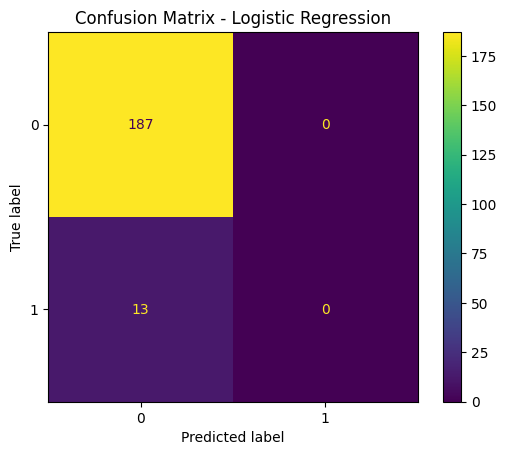

In [ ]:
# ======================
# –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
# ======================
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
print(f'–¢–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ {accuracy_score(y_test, y_pred_log)}')

0.935


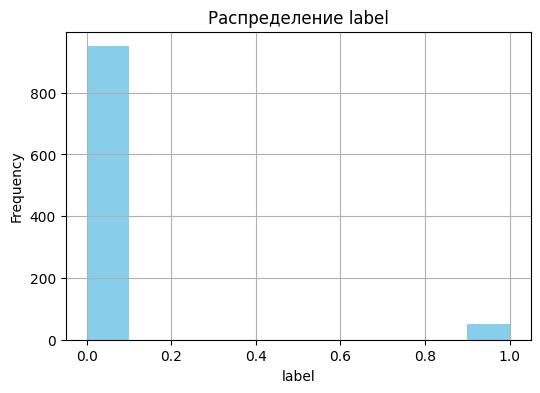

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
df['label'].hist(color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## –ê—Ä—Å–µ–Ω–∞–ª –ø—Ä–æ—Ç–∏–≤ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤

### üß™ Undersampling: —É–º–µ–Ω—å—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –æ–±—ä–µ–∫—Ç–æ–≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞

üìå –ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:

- –ú–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö

- –ö—Ä–∏—Ç–∏—á–Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è

- –ì–æ—Ç–æ–≤ –ø–æ–∂–µ—Ä—Ç–≤–æ–≤–∞—Ç—å —á–∞—Å—Ç—å—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression(max_iter=1000)
model_rus.fit(X_rus, y_rus)
print("=== Undersampling ===")
print(classification_report(y_test, model_rus.predict(X_test)))


=== Undersampling ===
              precision    recall  f1-score   support

           0       0.93      0.42      0.58       187
           1       0.06      0.54      0.11        13

    accuracy                           0.42       200
   macro avg       0.49      0.48      0.34       200
weighted avg       0.87      0.42      0.55       200



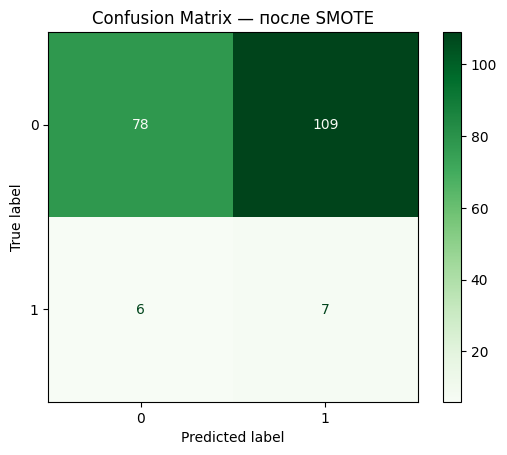

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_rus, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ Undersampling")
plt.show()

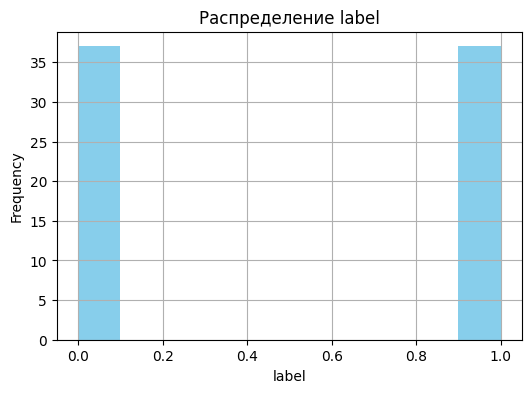

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
y_rus.hist(color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## üî¨ Oversampling: –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ/–≥–µ–Ω–µ—Ä–∞—Ü–∏—è –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–∞
üìå –ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:

- –ú–∞–ª–æ –¥–∞–Ω–Ω—ã—Ö

- –ú–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω—ã–π –∫–ª–∞—Å—Å –≤–∞–∂–µ–Ω

- –ì–æ—Ç–æ–≤ –º–∏—Ä–∏—Ç—å—Å—è —Å –≤–æ–∑–º–æ–∂–Ω—ã–º –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

model_ros = LogisticRegression(max_iter=1000)
model_ros.fit(X_ros, y_ros)
print("=== Oversampling ===")
print(classification_report(y_test, model_ros.predict(X_test)))


=== Oversampling ===
              precision    recall  f1-score   support

           0       0.94      0.57      0.71       187
           1       0.07      0.46      0.12        13

    accuracy                           0.56       200
   macro avg       0.50      0.51      0.41       200
weighted avg       0.88      0.56      0.67       200



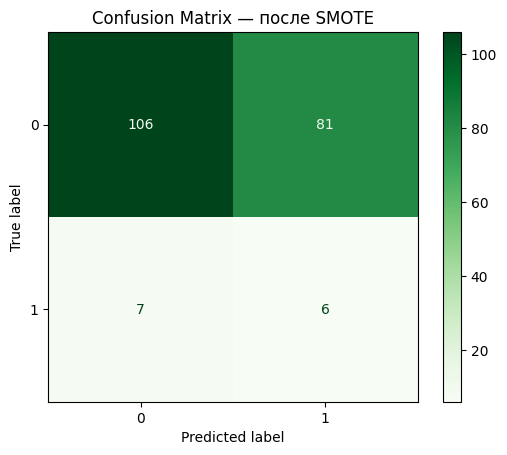

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ros, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ Oversampling")
plt.show()

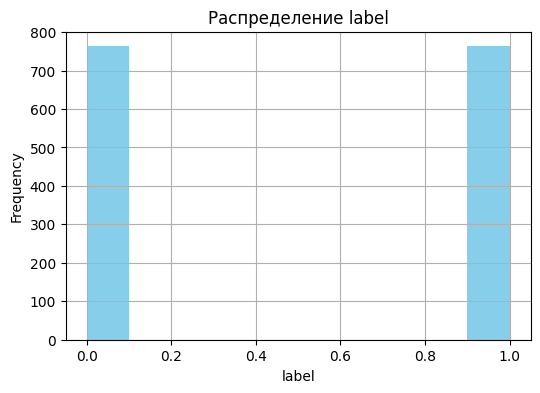

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
y_ros.hist(color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## üß¨ SMOTE / ADASYN: —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ

üìå –ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:

- –ú–∏–Ω–æ—Ä–∏—Ç–∞—Ä–Ω—ã–π –∫–ª–∞—Å—Å –∫—Ä–∞–π–Ω–µ —Ä–µ–¥–æ–∫

- –ü—Ä–æ—Å—Ç–æ–µ –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç

- –•–æ—Ç–∏–º –Ω–æ–≤—ã–µ —Ç–æ—á–∫–∏, –∞ –Ω–µ –∫–æ–ø–∏–∏

In [ ]:
# 4. –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

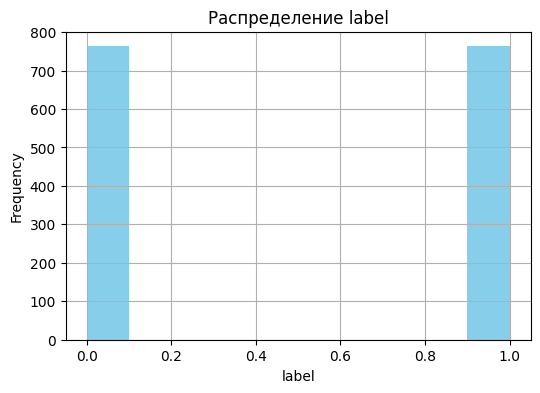

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
y_train_res.hist(color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

==== –ü–æ—Å–ª–µ SMOTE ====
              precision    recall  f1-score   support

           0       0.93      0.53      0.68       187
           1       0.06      0.46      0.11        13

    accuracy                           0.53       200
   macro avg       0.50      0.50      0.39       200
weighted avg       0.88      0.53      0.64       200



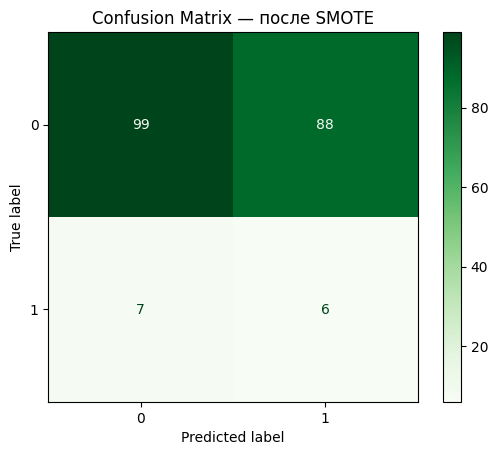

In [ ]:
# 5. –ú–æ–¥–µ–ª—å –ø–æ—Å–ª–µ SMOTE
smote_model = LogisticRegression()
smote_model.fit(X_train_res, y_train_res)
y_pred_smote = smote_model.predict(X_test)

print("==== –ü–æ—Å–ª–µ SMOTE ====")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(smote_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ SMOTE")
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

model_ada = LogisticRegression(max_iter=1000)
model_ada.fit(X_ada, y_ada)
print("=== ADASYN ===")
print(classification_report(y_test, model_ada.predict(X_test)))

=== ADASYN ===
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       187
           1       0.08      0.54      0.14        13

    accuracy                           0.56       200
   macro avg       0.51      0.55      0.42       200
weighted avg       0.89      0.56      0.66       200



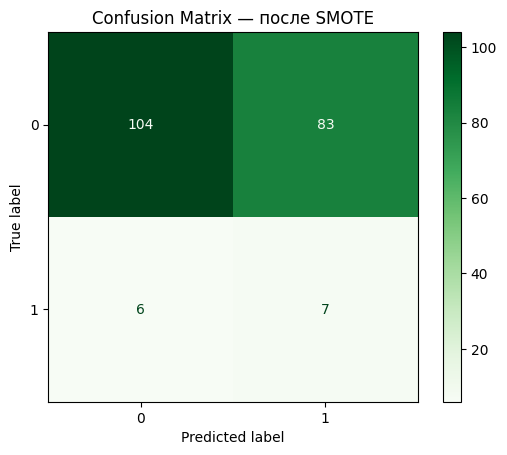

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ada, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ ADASYN")
plt.show()

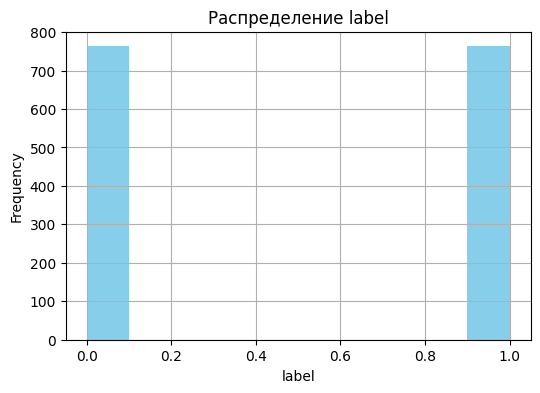

In [ ]:
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(6,4))
y_train_res.hist(color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## ‚öñÔ∏è Class Weights ‚Äî –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ —É—Å–∏–ª–µ–Ω–∏–µ –≤–ª–∏—è–Ω–∏—è –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–∞

üìå –ö–æ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å:

- –ù–µ —Ö–æ—á–µ—à—å –º–µ–Ω—è—Ç—å –¥–∞–Ω–Ω—ã–µ

- –ù—É–∂–Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ç–∞

- –í–∞–∂–Ω–∞ explainability



In [ ]:
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)
print("=== Class Weights ===")
print(classification_report(y_test, model_weighted.predict(X_test)))

=== Class Weights ===
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       187
           1       0.08      0.54      0.14        13

    accuracy                           0.56       200
   macro avg       0.51      0.55      0.42       200
weighted avg       0.89      0.56      0.67       200



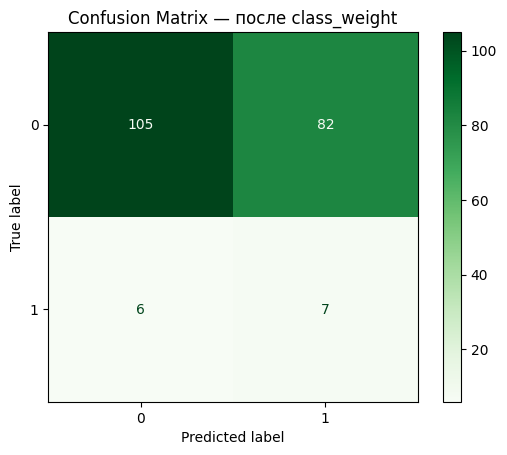

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_weighted, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ class_weight")
plt.show()

## ‚ö†Ô∏è –°—Ü–µ–Ω–∞—Ä–∏–π: "–ù–∏—á–µ–≥–æ –Ω–µ –ø–æ–º–æ–≥–∞–µ—Ç"
üß† –ó–Ω–∞—á–∏—Ç, –ø—Ä–æ–±–ª–µ–º–∞ –Ω–µ –≤ –±–∞–ª–∞–Ω—Å–µ, –∞ –≤‚Ä¶:

üíÄ –ü–ª–æ—Ö–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö (–º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –º–∏–Ω–æ—Ä–Ω–æ–º –∫–ª–∞—Å—Å–µ)

üßä –°–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π —Ä–∞–∑–Ω–∏—Ü–µ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö –∫–ª–∞—Å—Å–æ–≤

üß© –°–∏–ª—å–Ω–æ–π —à—É–º–Ω–æ—Å—Ç–∏ (–∫–ª–∞—Å—Å—ã –Ω–µ —Ä–∞–∑–¥–µ–ª–∏–º—ã –ª–∏–Ω–µ–π–Ω–æ/–º—è–≥–∫–æ)

üß± –û—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –≤ –º–æ–¥–µ–ª–∏ (–≤—Ä–µ–º–µ–Ω–Ω—ã–µ/–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å–≤—è–∑–∏ –Ω–µ—É—á—Ç–µ–Ω—ã)

In [ ]:
# üîÅ –ü–∞–π–ø–ª–∞–π–Ω: –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ‚Üí —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è ‚Üí –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏—è
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))  # balanced –Ω–∞ –≤—Å—è–∫–∏–π
])

# üîç –û–±—É—á–∞–µ–º
model.fit(X_train, y_train)

# üßæ –û—Ü–µ–Ω–∫–∞
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.52      0.66       187
           1       0.05      0.38      0.09        13

    accuracy                           0.51       200
   macro avg       0.49      0.45      0.38       200
weighted avg       0.87      0.51      0.63       200



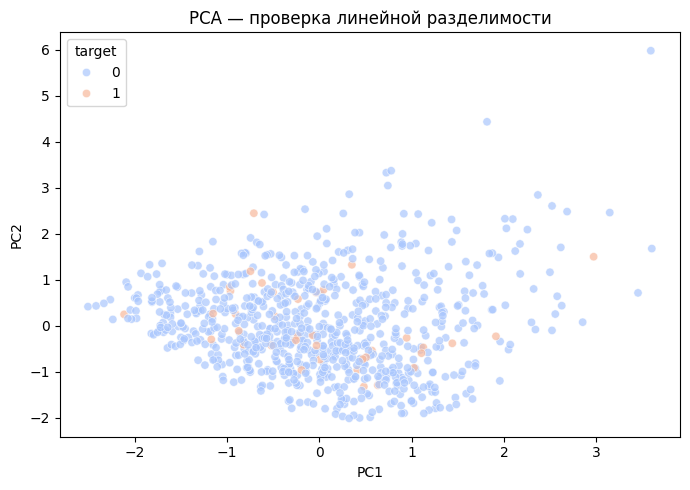

In [ ]:
# üß© –®—É–º–Ω–æ—Å—Ç—å ‚Äî PCA Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train.values

plt.figure(figsize=(7, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', alpha=0.7, palette='coolwarm')
plt.title("PCA ‚Äî –ø—Ä–æ–≤–µ—Ä–∫–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–∞–∑–¥–µ–ª–∏–º–æ—Å—Ç–∏")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred_tree = model.predict(X_test)

In [ ]:
print("=== Class Weights ===")
print(classification_report(y_test, model.predict(X_test)))

=== Class Weights ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



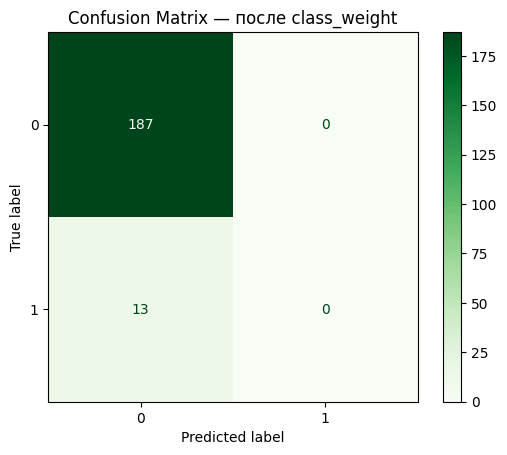

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix ‚Äî –ø–æ—Å–ª–µ class_weight")
plt.show()